In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Project.csv')

In [3]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [4]:
df.shape

(11162, 17)

In [5]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

#Exploratory Dta analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

<Axes: >

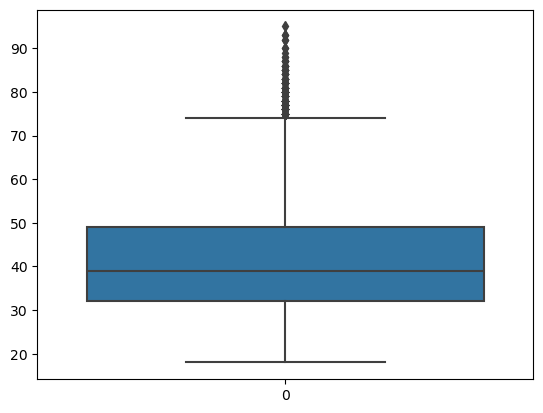

In [9]:
sns.boxplot(df['age'])

C:\Users\BittuBagui.DESKTOP-HQ7RHMK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


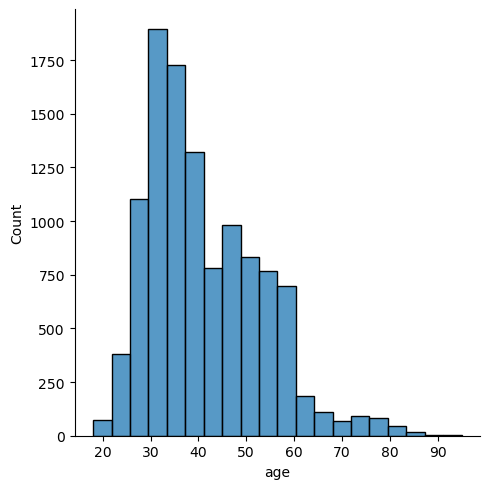

In [10]:
sns.displot(df['age'], bins = 20)

In [11]:
plt.figure(figsize =(10,20))

<Figure size 1000x2000 with 0 Axes>

<Figure size 1000x2000 with 0 Axes>

<Axes: >

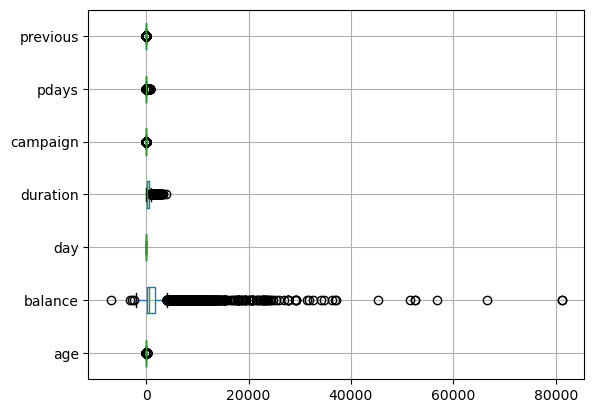

In [12]:
df.boxplot(vert = False)

In [13]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [14]:
#Converting job values into criteria

In [15]:
df['job']= df['job'].replace(['management', 'admin.'], 'white-collar')
df['job']=df['job'].replace(['services', 'housemaid'],'pink-collar')
df['job']=df['job'].replace(['retired','student','unemployed','unknown'],'other')

In [16]:
df['job'].value_counts()

job
white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: count, dtype: int64

In [17]:
df['default'] =df['default'].map( {'yes' : 1, 'no' : 0})
df['housing'] =df['housing'].map({'yes' : 1, 'no' : 0})
df['loan'] =df['loan'].map({'yes' : 1, 'no' : 0})

In [18]:
df.head()

age           job  marital  education  default  balance  housing  loan  \
0   59  white-collar  married  secondary        0     2343        1     0   
1   56  white-collar  married  secondary        0       45        0     0   
2   41    technician  married  secondary        0     1270        1     0   
3   55   pink-collar  married  secondary        0     2476        1     0   
4   54  white-collar  married   tertiary        0      184        0     0   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes

In [19]:
df.drop(['month','day'], axis =1, inplace =True)

In [20]:
df.head()

age           job  marital  education  default  balance  housing  loan  \
0   59  white-collar  married  secondary        0     2343        1     0   
1   56  white-collar  married  secondary        0       45        0     0   
2   41    technician  married  secondary        0     1270        1     0   
3   55   pink-collar  married  secondary        0     2476        1     0   
4   54  white-collar  married   tertiary        0      184        0     0   

   contact  duration  campaign  pdays  previous poutcome deposit  
0  unknown      1042         1     -1         0  unknown     yes  
1  unknown      1467         1     -1         0  unknown     yes  
2  unknown      1389         1     -1         0  unknown     yes  
3  unknown       579         1     -1         0  unknown     yes  
4  unknown       673         2     -1         0  unknown     yes

In [21]:
df['deposit'] = df['deposit'].map({ 'yes' : 1, 'no' : 0})

In [22]:
df.head()

age           job  marital  education  default  balance  housing  loan  \
0   59  white-collar  married  secondary        0     2343        1     0   
1   56  white-collar  married  secondary        0       45        0     0   
2   41    technician  married  secondary        0     1270        1     0   
3   55   pink-collar  married  secondary        0     2476        1     0   
4   54  white-collar  married   tertiary        0      184        0     0   

   contact  duration  campaign  pdays  previous poutcome  deposit  
0  unknown      1042         1     -1         0  unknown        1  
1  unknown      1467         1     -1         0  unknown        1  
2  unknown      1389         1     -1         0  unknown        1  
3  unknown       579         1     -1         0  unknown        1  
4  unknown       673         2     -1         0  unknown        1

In [23]:
print('Customer that have not been contacted before:', len(df[df.pdays == -1]))

Customer that have not been contacted before: 8324


In [24]:
print('Maximum values on pdays:', df['pdays'].max())

Maximum values on pdays: 854


In [25]:
df.loc[df['pdays'] == -1, 'pdays'] =10000

#creat a new colum : recent_pdays

In [26]:
df['recent_pdays'] = np.where(df['pdays'], 1/df.pdays, 1/df.pdays)

In [27]:
df.drop('pdays', axis =1, inplace =True)

In [28]:
df.head()

age           job  marital  education  default  balance  housing  loan  \
0   59  white-collar  married  secondary        0     2343        1     0   
1   56  white-collar  married  secondary        0       45        0     0   
2   41    technician  married  secondary        0     1270        1     0   
3   55   pink-collar  married  secondary        0     2476        1     0   
4   54  white-collar  married   tertiary        0      184        0     0   

   contact  duration  campaign  previous poutcome  deposit  recent_pdays  
0  unknown      1042         1         0  unknown        1        0.0001  
1  unknown      1467         1         0  unknown        1        0.0001  
2  unknown      1389         1         0  unknown        1        0.0001  
3  unknown       579         1         0  unknown        1        0.0001  
4  unknown       673         2         0  unknown        1        0.0001

In [29]:
# Catagorical veriables into dummies

In [30]:
df_with_dummis = pd.get_dummies(data =df, columns = ['job', 'marital', 'contact', 'poutcome', 'education'], prefix = ['job', 'marital', 'contact', 'poutcome', 'education'], dtype = 'int64')

In [31]:
df_with_dummis.head()

age  default  balance  housing  loan  duration  campaign  previous  \
0   59        0     2343        1     0      1042         1         0   
1   56        0       45        0     0      1467         1         0   
2   41        0     1270        1     0      1389         1         0   
3   55        0     2476        1     0       579         1         0   
4   54        0      184        0     0       673         2         0   

   deposit  recent_pdays  ...  contact_telephone  contact_unknown  \
0        1        0.0001  ...                  0                1   
1        1        0.0001  ...                  0                1   
2        1        0.0001  ...                  0                1   
3        1        0.0001  ...                  0                1   
4        1        0.0001  ...                  0                1   

   poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  \
0                 0               0                 0                 1   
1                 0               0                 0                 1   
2                 0               0                 0                 1   
3                 0               0                 0                 1   
4                 0               0                 0                 1   

   education_primary  education_secondary  education_tertiary  \
0                  0                    1                   0   
1                  0                    1                   0   
2                  0                    1                   0   
3                  0                    1                   0   
4                  0                    0                   1   

   education_unknown  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 31 columns]

<Axes: xlabel='age', ylabel='balance'>

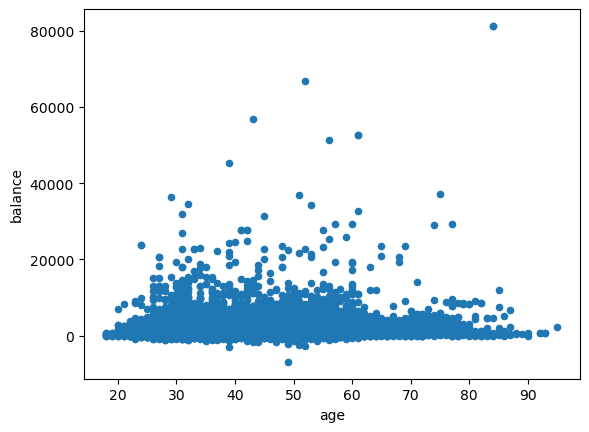

In [32]:
df_with_dummis.plot(kind = 'scatter', x = 'age', y = 'balance')

In [33]:
len(df_with_dummis[(df_with_dummis.deposit== 1) & (df_with_dummis.loan) & (df_with_dummis.housing)])

265

In [35]:
len(df_with_dummis[(df_with_dummis.deposit== 1) & (df_with_dummis.default == 1)])

52

<Axes: xlabel='job', ylabel='deposit'>

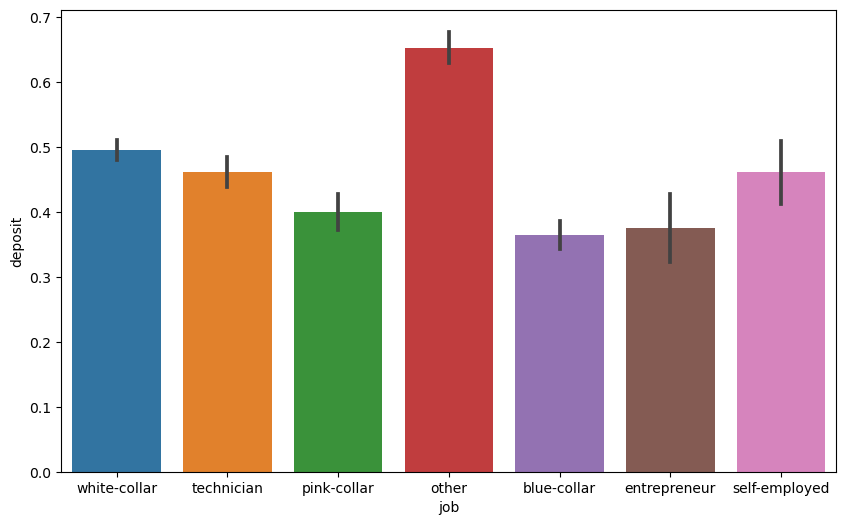

In [36]:
plt.figure(figsize = (10,6))
sns.barplot(x= 'job', y ='deposit', data= df)

In [37]:
bankc1 = df_with_dummis

In [38]:
bankc1.corr()

age   default   balance   housing      loan  \
age                  1.000000 -0.011425  0.112300 -0.168700 -0.031418   
default             -0.011425  1.000000 -0.060954  0.011076  0.076434   
balance              0.112300 -0.060954  1.000000 -0.077092 -0.084589   
housing             -0.168700  0.011076 -0.077092  1.000000  0.076761   
loan                -0.031418  0.076434 -0.084589  0.076761  1.000000   
duration             0.000189 -0.009760  0.022436  0.035051 -0.001914   
campaign            -0.005278  0.030975 -0.013894  0.006660  0.034722   
previous             0.020169 -0.035273  0.030805 -0.000840 -0.022668   
deposit              0.034901 -0.040680  0.081129 -0.203888 -0.110580   
recent_pdays         0.019102 -0.011290 -0.004379 -0.029350 -0.012697   
job_blue-collar     -0.066567  0.022779 -0.046220  0.189848  0.057956   
job_entrepreneur     0.024176  0.022060  0.005039  0.011492  0.042631   
job_other            0.296418 -0.018130  0.050744 -0.233309 -0.096196   
job_pink-collar     -0.027942 -0.007173 -0.041063  0.043884  0.014969   
job_self-employed   -0.023163  0.007493  0.020264 -0.016903  0.004299   
job_technician      -0.082716  0.003109  0.003802  0.006551  0.006864   
job_white-collar    -0.080122 -0.013425  0.013780 -0.012111 -0.007871   
marital_divorced     0.186349  0.019633 -0.017586  0.007430  0.026463   
marital_married      0.318436 -0.006819  0.025431  0.036305  0.044148   
marital_single      -0.467799 -0.006255 -0.014994 -0.043817 -0.065288   
contact_cellular    -0.085019 -0.026301  0.007816 -0.181475 -0.000534   
contact_telephone    0.210912 -0.022157  0.060350 -0.088433 -0.020123   
contact_unknown     -0.037860  0.042784 -0.046237  0.255022  0.013135   
poutcome_failure    -0.008071 -0.024650  0.001695  0.087741  0.006264   
poutcome_other      -0.018715 -0.017475  0.028521  0.010006 -0.020164   
poutcome_success     0.062114 -0.040272  0.045603 -0.136299 -0.080370   
poutcome_unknown    -0.027021  0.053554 -0.046091  0.024227  0.059783   
education_primary    0.231150  0.013858 -0.000673  0.017002  0.006854   
education_secondary -0.094400 -0.000618 -0.070609  0.118514  0.079583   
education_tertiary  -0.101372 -0.011768  0.069128 -0.114955 -0.067513   
education_unknown    0.077761  0.005421  0.014596 -0.053191 -0.050249   

                     duration  campaign  previous   deposit  recent_pdays  \
age                  0.000189 -0.005278  0.020169  0.034901      0.019102   
default             -0.009760  0.030975 -0.035273 -0.040680     -0.011290   
balance              0.022436 -0.013894  0.030805  0.081129     -0.004379   
housing              0.035051  0.006660 -0.000840 -0.203888     -0.029350   
loan                -0.001914  0.034722 -0.022668 -0.110580     -0.012697   
duration             1.000000 -0.041557 -0.026716  0.451919     -0.014868   
campaign            -0.041557  1.000000 -0.049699 -0.128081     -0.026296   
previous            -0.026716 -0.049699  1.000000  0.139867      0.122076   
deposit              0.451919 -0.128081  0.139867  1.000000      0.034457   
recent_pdays        -0.014868 -0.026296  0.122076  0.034457      1.000000   
job_blue-collar      0.029986  0.005522 -0.039939 -0.100840     -0.018514   
job_entrepreneur    -0.000908  0.013883 -0.022470 -0.034443      0.006251   
job_other            0.010680 -0.050212  0.031191  0.144408      0.024356   
job_pink-collar      0.005345  0.011958 -0.028623 -0.051717     -0.001183   
job_self-employed    0.013506  0.001776 -0.002338 -0.004707     -0.008226   
job_technician      -0.010440  0.021738  0.002035 -0.011557     -0.007412   
job_white-collar    -0.031980  0.001944  0.034929  0.031621      0.004516   
marital_divorced     0.021364 -0.006828 -0.026566  0.005228     -0.020253   
marital_married     -0.036179  0.047722 -0.005176 -0.092157      0.009583   
marital_single       0.023847 -0.046165  0.023817  0.094632      0.003736   
contact_cellular     0.020938 -0.067236  0.147519  0.223252      0.04014

#Heatmap

Text(0.5, 1.0, 'Heatmap of correlation Matrix')

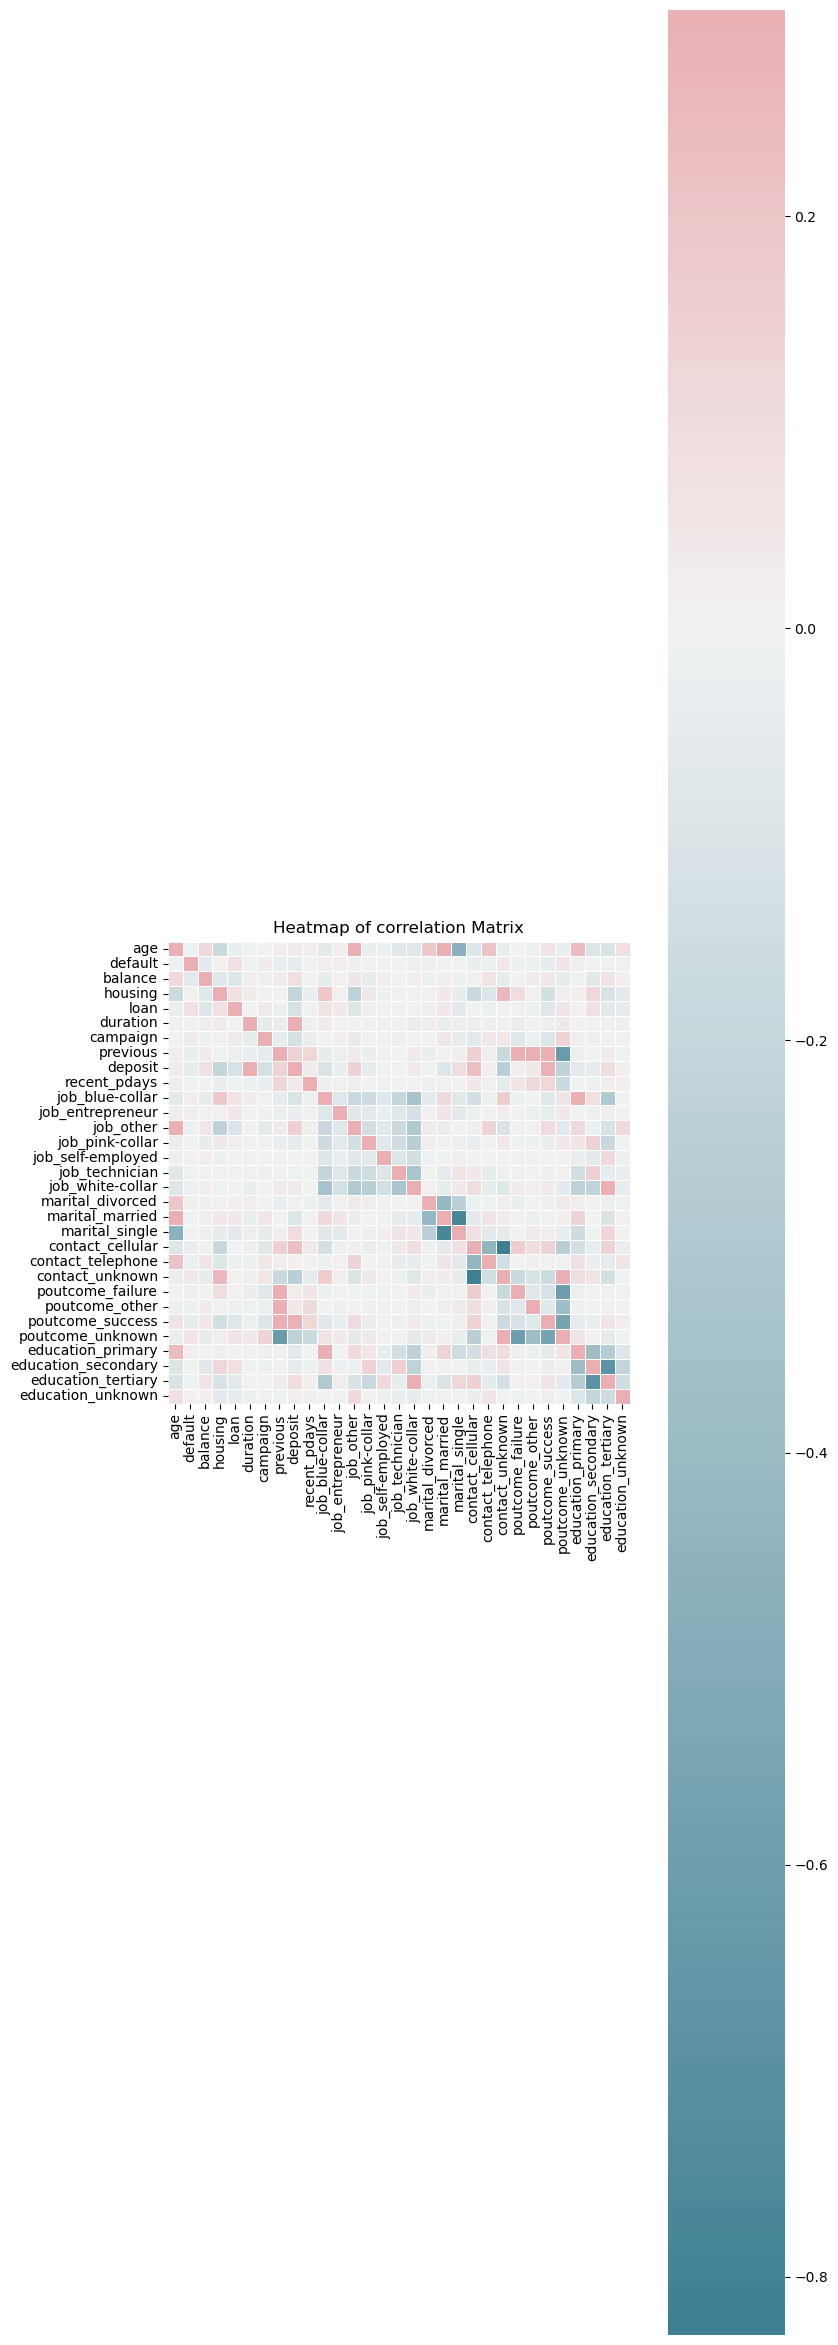

In [45]:
corr = bankc1.corr()
plt.figure(figsize = (10,6))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, cmap =cmap,
           vmax = .3, center =0, square = True, linewidth =0.5, cbar_kws = {'shrink' :82})
plt.title('Heatmap of correlation Matrix')

In [48]:
corr_deposit = pd.DataFrame(corr['deposit'].drop('deposit'))
corr_deposit.sort_values(by = 'deposit', ascending = False)

deposit
duration             0.451919
poutcome_success     0.286642
contact_cellular     0.223252
job_other            0.144408
previous             0.139867
marital_single       0.094632
education_tertiary   0.094598
balance              0.081129
poutcome_other       0.044059
age                  0.034901
recent_pdays         0.034457
job_white-collar     0.031621
poutcome_failure     0.020714
contact_telephone    0.016420
education_unknown    0.014355
marital_divorced     0.005228
job_self-employed   -0.004707
job_technician      -0.011557
job_entrepreneur    -0.034443
default             -0.040680
job_pink-collar     -0.051717
education_secondary -0.051952
education_primary   -0.063002
marital_married     -0.092157
job_blue-collar     -0.100840
loan                -0.110580
campaign            -0.128081
housing             -0.203888
poutcome_unknown    -0.230470
contact_unknown     -0.256136

In [57]:
X =df_with_dummis.drop('deposit', axis =1)
y= df_with_dummis['deposit']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state =3)

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
model = DecisionTreeClassifier(max_depth=2)

In [100]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [101]:
y_pred=model.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_pred, y_test)

0.7208121827411168

Overfitting Check

In [104]:
y_train_pred = model.predict(X_train)

In [105]:
accuracy_score(y_train, y_train_pred) #training accuracy

0.7313451939075899

In [106]:
y_pred = model.predict(X_test)

In [107]:
accuracy_score(y_test, y_pred) #testing accuracy

0.7208121827411168

In [108]:
0.7313451939075899 - 0.7208121827411168

0.010533011166473094

In [72]:
0.010533011166473094 * 100

1.0533011166473094

Stratified-K-Fold CV

In [109]:
from sklearn.model_selection import StratifiedKFold

In [110]:
stf = StratifiedKFold(n_splits = 10) #k=10

In [111]:
stf.get_n_splits(X=X, y=y)

10

In [112]:
dtc = DecisionTreeClassifier()

In [114]:
accuracy = []
for train_index, test_index in stf.split(X,y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index] #fetching the original data points using ILOC
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    dtc.fit(X1_train, y1_train)
    y1_pred = dtc.predict(X1_test)
    accuracy.append(accuracy_score(y1_test, y1_pred))

In [115]:
accuracy

[0.6633840644583706,
 0.7179946284691137,
 0.6765232974910395,
 0.717741935483871,
 0.7267025089605734,
 0.7240143369175627,
 0.7840501792114696,
 0.7652329749103942,
 0.7338709677419355,
 0.7508960573476703]

In [91]:
np.mean(accuracy)

0.726309350763534

Hyperparameter Tuning GridSearchCV

In [116]:
param = {'min_weight_fraction_leaf' : [0.1,0.2,0.3],
        'max_features' : [1,2,3,4,44,56,5,78,9,99, 'auto', 'sqrt', 'log2'],
        'criterion' : ['gini', 'entropy', 'log_loss'],
        'splitter': ['best', 'random'],
         'max_depth': [1,2,3,4,44,56,5,6,7],
        'min_samples_split' : [0.1,0.2,0.3,0.5,8,10,12,14,16]}

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
gcv = GridSearchCV(estimator = dtc, param_grid = param, cv =10)

In [95]:
gcv.fit(X,y)

C:\Users\BittuBagui.DESKTOP-HQ7RHMK\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\BittuBagui.DESKTOP-HQ7RHMK\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\BittuBagui.DESKTOP-HQ7RHMK\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\BittuBagui.DESKTOP-HQ7RHMK\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 44, 56, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 44, 56, 5, 78, 9, 99,
                                          'auto', 'sqrt', 'log2'],
                         'min_samples_split': [0.1, 0.2, 0.3, 0.5, 8, 10, 12,
                                               14, 16],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3],
                         'splitter': ['best', 'random']})

In [96]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 9,
 'min_samples_split': 0.1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [123]:
dtc = DecisionTreeClassifier(max_features =9 , min_weight_fraction_leaf = 0.1, max_depth = 6, min_samples_split = 0.1, splitter = 'best', criterion= 'entropy')

In [124]:
accuracy = []
for train_index, test_index in stf.split(X,y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index] #fetching the original data points using ILOC
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    dtc.fit(X1_train, y1_train)
    y1_pred = dtc.predict(X1_test)
    accuracy.append(accuracy_score(y1_test, y1_pred))

In [125]:
accuracy

[0.5219337511190689,
 0.8549686660698299,
 0.6917562724014337,
 0.8145161290322581,
 0.6684587813620072,
 0.732078853046595,
 0.6684587813620072,
 0.7311827956989247,
 0.7401433691756273,
 0.7267025089605734]

In [126]:
np.mean(accuracy)

0.7150199908228326